#  Исследовательский анализ данных о компьютерных играх

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

### Откроем файл с данными и изучим общую информацию. 

**1. Импортируем библиотеку pandas и matplotlib. Считаем данные из csv-файла в датафрейм и сохраним в переменную data.**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
pd.set_option('max_columns', None)
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [2]:
try:
    raw_data = pd.read_csv('D:\\Мои документы\\DS\\games.csv')
except:
    raw_data = pd.read_csv('/datasets/games.csv')

**2. Выведем первые 20 строчек датафрейма data на экран.**

In [3]:
raw_data.head(20)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


**3. Выведем основную информацию о датафрейме с помощью метода info().**

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В таблице 11 столбцов и 16715 строк.

**Согласно документации в датафрейме содержится следующая информация:**
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

- Наименования колонок не соответствуют "змеиному" стилю. 
- Названия колонок соответствуют документации.
- Пропущенные значения имеются в 6 столбцах.
- Столбцы `Year_of_Release`и `Critic_Score` хранятся с типом float64 
- Столбец `User_Score` хранится с типом object.

 Переименуем колонки, приведем к нижнему регистру.

In [5]:
raw_data = raw_data.rename(columns={'Name':'name','Platform':'platform','Year_of_Release':'year_of_release','Genre':'genre',
                    'NA_sales':'na_sales','EU_sales':'eu_sales','JP_sales':'jp_sales','Other_sales':'other_sales',
                    'Critic_Score':'critic_score','User_Score':'user_score','Rating':'rating'}) 

### Предобработка данных

Перед началом, создадим копию данных и присвоим название "data"

In [6]:
data=raw_data.copy()

In [7]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

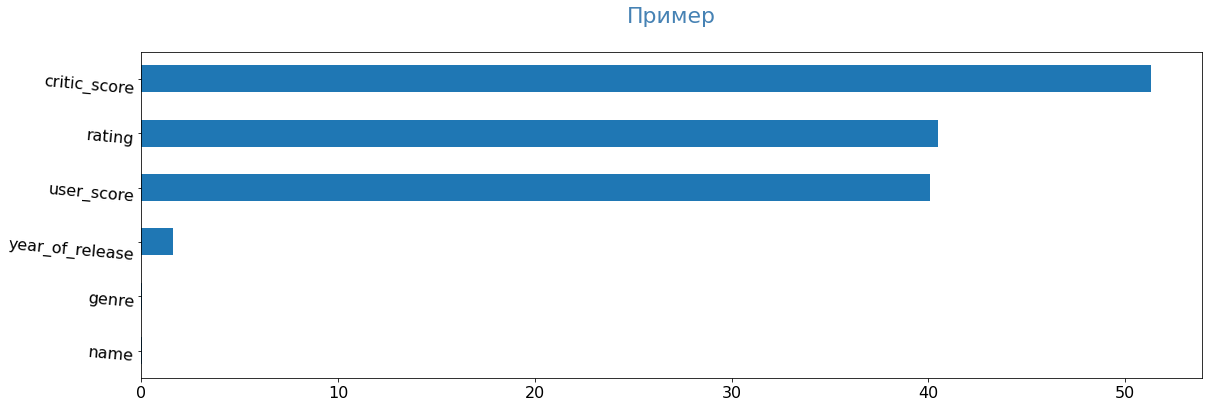

In [8]:
pass_value_barh(data)

In [9]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), legend = False, fontsize = 16)
            .set_title('Процент пропусков' + "\n", fontsize = 22, color = 'SteelBlue')
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

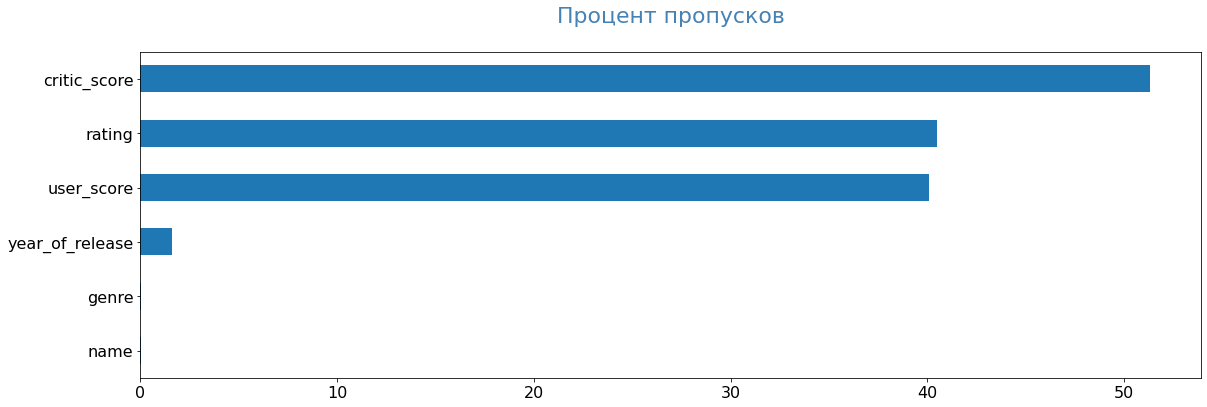

In [10]:
pass_value_barh(data)

#### Поиск и устранение пропусков в данных

Выведем количество пропущенных значений для каждого столбца.

In [11]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

В стобцах `name` и `genre` имеются 2 пропуска, выведем на экран пропуски в столбце `name`, и посмотрим совпадают ли они с `genre`

In [12]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [13]:
# удалим эти строки
data=data.dropna(subset=['name'])

In [14]:
data[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Пропуски в столбце `year_of_release` — год выпуска игры. Заполнить значения не представляется возможным. Поэтому оставим их пустыми.

In [15]:
# жизненный срок платформы

years_of_life = data.pivot_table(index='platform',values='year_of_release',aggfunc=['min','max'])
years_of_life.columns=['min','max']
years_of_life['years_of_life']=years_of_life['max']-years_of_life['min']
years_of_life

# years_of_life.sort_values(by = 'years_of_life', ascending = False)

,min,max,years_of_life
platform,,,
2600,1980.0,1989.0,9.0
3DO,1994.0,1995.0,1.0
3DS,2011.0,2016.0,5.0
DC,1998.0,2008.0,10.0
DS,1985.0,2013.0,28.0
GB,1988.0,2001.0,13.0
GBA,2000.0,2007.0,7.0
GC,2001.0,2007.0,6.0
GEN,1990.0,1994.0,4.0


Посмотрим на уникальные значения в столбцах `critic_score`, `user_score` и `rating`. И посчитаем их количество

In [18]:
data['rating'].value_counts(dropna=False)

NaN     6764
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

In [19]:
data['user_score'].value_counts(dropna=False)

NaN    6699
tbd    2424
7.8     324
8       290
8.2     282
       ... 
1.3       2
0.6       2
0.3       2
0         1
9.7       1
Name: user_score, Length: 97, dtype: int64

In [20]:
data['critic_score'].value_counts(dropna=False)

NaN     8576
70.0     256
71.0     254
75.0     245
78.0     240
        ... 
29.0       3
21.0       1
22.0       1
13.0       1
17.0       1
Name: critic_score, Length: 83, dtype: int64

В столбце `user_score`с оценкой пользователей присутствуют значение 'tbd'.

TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено). Используется, если какая-то информация еще не определена или решение по вопросу не принято. Заменим их позже на 'NaN' и  переведем данные в формат float.

Так же не представляется возможным заполнить пустые значения в столбце`critic_score`. Оставим  без изменений.

 `Rating` — рейтинг от организации ESRB. ESRB была основана в 1994 году ассоциацией Interactive Digital Software Association (современное название — «Entertainment Software Association»). 

In [21]:
print(f'Количество пропусков в столбце Rating - {len(data[(data["rating"].isna()) & (data["year_of_release"]>1994)])} выпущенных после 1994 года.')
print(f'Количество пропусков в столбце Rating - {len(data[(data["rating"].isna()) & (data["year_of_release"]<=1994)])}  выпущенных до 1994 года.')

Количество пропусков в столбце Rating - 6195 выпущенных после 1994 года.
Количество пропусков в столбце Rating - 481  выпущенных до 1994 года.


В мире существуют еще другие рейтинговые организации, возможно такое количество пропусков, связано с тем что рейтинг играм был присвоен в одной из них, например:
- PEGI- европейская рейтинговая система компьютерных и видеоигр
- CERO — японская рейтинговая организация

 Пустые значения в столбце `rating` мы заменим на "undefined"

In [22]:
data['rating']= data['rating'].fillna("undefined")

In [23]:
data.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating                0
dtype: int64

#### Замена типов данных

In [24]:
data.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

В столбцах `year_of_release` и `critic_score`,  переведем данные в формат int.

In [25]:
data['year_of_release'] = pd.array(data['year_of_release'], dtype=pd.Int64Dtype())
data['critic_score'] = pd.array(data['critic_score'], dtype=pd.Int64Dtype())

В столбце `user_score` переведем данные в формат float.

В столбцах `name` и `genre`, переведем данные в формат str.

In [26]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')
data['name'] = data['name'].astype(str)
data['genre'] = data['genre'].astype(str)
data.dtypes

name                object
platform            object
year_of_release      Int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score         Int64
user_score         float64
rating              object
dtype: object

####  Устранение  дубликатов

Проверим наличие явных дубликатов

In [27]:
data.duplicated().sum() 

0

Явных дубликатов в данных нет.

Посмотрим сколько уникальных названий игр у нас в данных, и не имеются ли неявные дубликаты.

In [28]:
display(sorted(data['name'].unique()))

[' Beyblade Burst',
 ' Fire Emblem Fates',
 " Frozen: Olaf's Quest",
 ' Haikyu!! Cross Team Match!',
 ' Tales of Xillia 2',
 "'98 Koshien",
 '.hack//G.U. Vol.1//Rebirth',
 '.hack//G.U. Vol.2//Reminisce',
 '.hack//G.U. Vol.2//Reminisce (jp sales)',
 '.hack//G.U. Vol.3//Redemption',
 '.hack//Infection Part 1',
 '.hack//Link',
 '.hack//Mutation Part 2',
 '.hack//Outbreak Part 3',
 '.hack//Quarantine Part 4: The Final Chapter',
 '.hack: Sekai no Mukou ni + Versus',
 '007 Racing',
 '007: Quantum of Solace',
 '007: The World is not Enough',
 '007: Tomorrow Never Dies',
 '1 vs. 100',
 '1/2 Summer +',
 '10 Minute Solution',
 '100 All-Time Favorites',
 '100 Classic Books',
 '100 Classic Games',
 '1000 Cooking Recipes from ELLE à table',
 '1001 Touch Games',
 '101-in-1 Explosive Megamix',
 '101-in-1 Party Megamix Wii',
 '101-in-1 Sports Megamix',
 '101-in-1 Sports Party Megamix',
 '1080°: TenEighty Snowboarding',
 '11eyes: CrossOver',
 '12-Sai. Honto no Kimochi',
 '12-Sai. Koisuru Diary',
 '12Ri

In [29]:
print('Количество уникальных названий игр:', len(data['name'].value_counts()))

Количество уникальных названий игр: 11559


Скрытые дубликаты в названии игр не были выявлены 

Поишем дубликаты по ключевым столбцам ['name', 'platform', 'year_of_release'] , с обязательным приведением содержимого столбцов к нижнему регистру

In [30]:
collumns=['name', 'platform']
data_dub=data[['name', 'platform', 'year_of_release']]
for col in collumns:
    data_dub[col]=data_dub[col].str.lower()

data_dub[data_dub.duplicated()]


,name,platform,year_of_release
16230,madden nfl 13,ps3,2012


In [31]:
data = data.drop([16230], axis=0) #удалим эту строчку из данных

In [32]:
display(sorted(data['genre'].unique()))

['Action',
 'Adventure',
 'Fighting',
 'Misc',
 'Platform',
 'Puzzle',
 'Racing',
 'Role-Playing',
 'Shooter',
 'Simulation',
 'Sports',
 'Strategy']

Скрытые дубликаты в названии жанра игры не были выявлены.

In [33]:
display(sorted(data['platform'].unique()))

['2600',
 '3DO',
 '3DS',
 'DC',
 'DS',
 'GB',
 'GBA',
 'GC',
 'GEN',
 'GG',
 'N64',
 'NES',
 'NG',
 'PC',
 'PCFX',
 'PS',
 'PS2',
 'PS3',
 'PS4',
 'PSP',
 'PSV',
 'SAT',
 'SCD',
 'SNES',
 'TG16',
 'WS',
 'Wii',
 'WiiU',
 'X360',
 'XB',
 'XOne']

Скрытые дубликаты в названии игровых платформ не были выявлены 

#### Посчитаем суммарные продажи во всех регионах и запишем их в столбец `total_sales`.

In [34]:
data['total_sales']=data['na_sales']+ data['eu_sales']+ data['jp_sales'] +data['other_sales'] 

In [35]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,undefined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,undefined,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,undefined,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,<NA>,NaN,undefined,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,undefined,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,<NA>,NaN,undefined,0.01


#### Вывод

- Данные приведены к типу, в соответствии с хранящейся в них информации.
- Заполнены пропущенные значения там, где это возможно.
- Возможно большое количество пропусков в столбце рейтинг, связано с тем, что рейтинг играм был присвоен в другой рейтинговой организации, или игра выпущена до 1994 года. Либо рейтинг еще не присвоен.
- Пропущенные значений в столбцах отзывы критиков и отзывы пользователей - возможны, из-за отсутсвия информации об оценках на тех открытых источников от куда они взяты. 

**В таблицу с данными добавлена информация о:**

- общей сумме продаж во всех регионах

In [36]:
# check 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16712 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16712 non-null  object 
 1   platform         16712 non-null  object 
 2   year_of_release  16443 non-null  Int64  
 3   genre            16712 non-null  object 
 4   na_sales         16712 non-null  float64
 5   eu_sales         16712 non-null  float64
 6   jp_sales         16712 non-null  float64
 7   other_sales      16712 non-null  float64
 8   critic_score     8136 non-null   Int64  
 9   user_score       7589 non-null   float64
 10  rating           16712 non-null  object 
 11  total_sales      16712 non-null  float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 1.7+ MB


### Проведите исследовательский анализ данных

#### Изучение данных

**Рассмотрим следующие параметры:**

- Сколько игр выпускалось в разные годы.
- Как менялись продажи по платформам. 
- Какие платформы лидируют по продажам, растут или падают. Выберем несколько потенциально прибыльных платформ.
- Влияют ли на продажи внутри одной популярной платформы отзывы пользователей и критиков. 
- Общее распределение игр по жанрам. Самые прибыльных жанры. Выделяются ли жанры с высокими и низкими продажами

#####  Сколько игр выпускалось в разные годы.

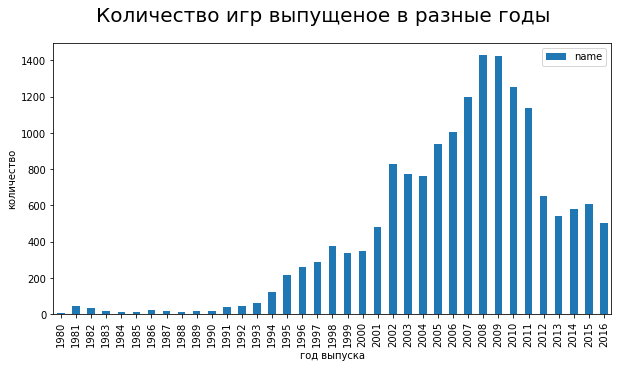

In [37]:
data.pivot_table(index='year_of_release', values='name', aggfunc='count').plot.bar(figsize=(10, 5)); #Построем гистограмму
plt.suptitle('Количество игр выпущеное в разные годы',fontsize = 20,)
plt.xlabel('год выпуска')
plt.ylabel('количество')

plt.show()


In [38]:
print('Количество игр выпущенных до 1994 года - ',len(data[data["year_of_release"]<1994]))

print(f'Что составляет - {round((len(data[data["year_of_release"]<1994])*100)/(raw_data.shape[0]),2)}% от данных')

Количество игр выпущенных до 1994 года -  365
Что составляет - 2.18% от данных


До 1994 года колличество выпускаемых игр в год не превышало нескольких десятков.

С 1994 года начинается плавный рост выпуска новых игр до несколько сотен в год. 

С 2002 количество выпускаемых игр резко возрастает и достигает пика в 2008-2009 годах. Количество выпускаемых игр в год превышает 1400 шт. 

С 2010 года начинается спад, в 2012 году происходит сокращение выпускаемых игр в двое иуже не превышает 700 шт, и до 2016 года количество игр в год в среднем составляет 600 игр.

#####  Как менялись продажи по платформам

Выберем платформы с наибольшими суммарными продажами

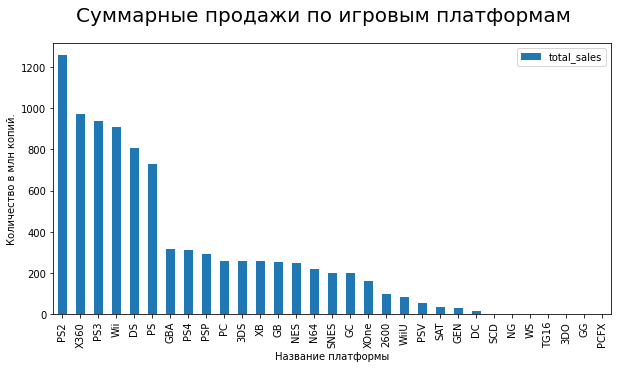

In [39]:
data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).plot.bar(figsize=(10, 5)); #Построем гистограмму
plt.suptitle('Суммарные продажи по игровым платформам',fontsize = 20,)
plt.xlabel('Название платформы')
plt.ylabel('Количество в млн копий.')

plt.show()

В явных лидерах - DS, PS, PS2, PS3, Wii, X360

Построем распределение  сумарных продаж по этим платформам по годам.

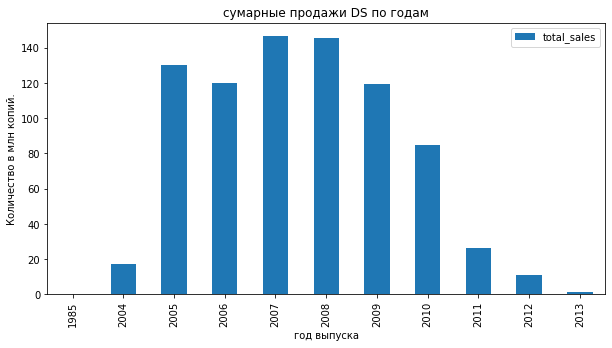

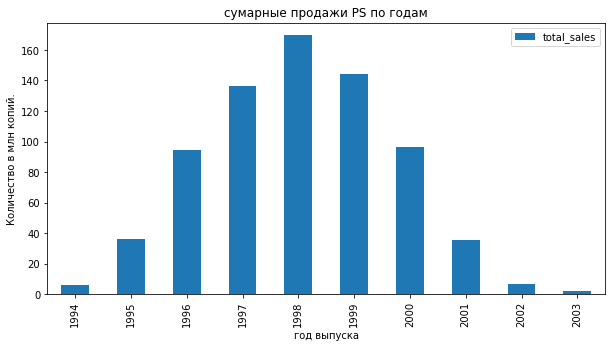

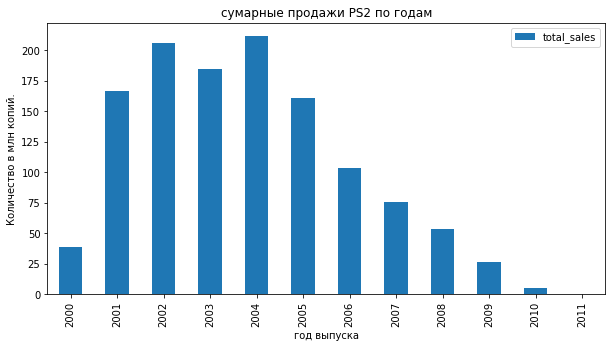

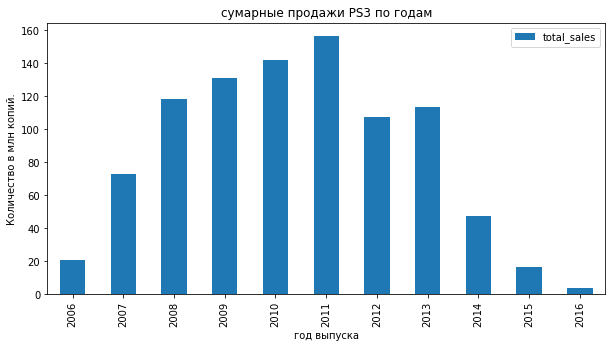

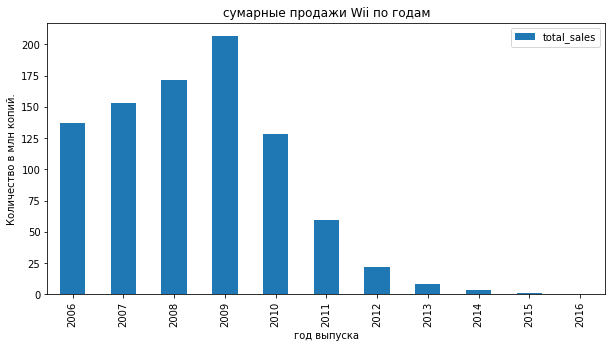

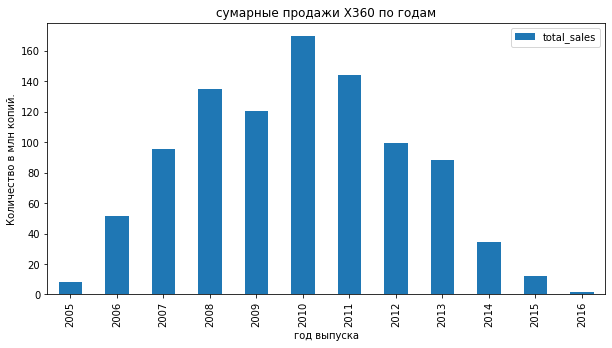

In [40]:
for platform in ['DS', 'PS', 'PS2', 'PS3', 'Wii', 'X360']:
    data[data['platform']==platform].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot.bar(figsize=(10, 5))
    
    plt.title(f"сумарные продажи {platform} по годам");
    plt.xlabel('год выпуска')
    plt.ylabel('Количество в млн копий.')
   
    plt.show()

На гистограммах хорошо виден характерный срок  когда появляются новые и исчезают старые платформы. Средний срок продолжительности продаж игровых платформ - 10 лет. При этом пик продаж приходится на середину этого срока - 5 лет.


Так же характерен как резкий рост в два и более раз каждый год вначале продаж, так и такой же резкий ежегодный спад к завершению продаж.

Странный выброс 1985 года у DS. Консоль Nintendo DS (яп. ニンテンドーDS Нинтэндо: DS, сокращённо NDS либо DS) была выпущена в 2004 году в Канаде, США и Японии. Стоит удалить аномалию

In [41]:
data[(data['platform'] == 'DS') & (data['year_of_release'] == 1985)]


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,<NA>,NaN,undefined,0.02


In [42]:
data = data.drop([15957], axis=0) 

Для целей прогнозирования продаж на следующий год в такой динамично меняющейся индустрии, как компьютерные игры возьмем данные не более чем за 3 года. 

**Для дальнейшего анализа возьмем данные за актуальный период с 2014 по 2016 год. Эти данные помогут построить прогноз на 2017 год.**

In [43]:
data_actual=data[data['year_of_release']>2013]

#####  Какие платформы лидируют по продажам, растут или падают. Выберем несколько потенциально прибыльных платформ.

In [44]:
data_actual_sum=data_actual.pivot_table(index='platform',columns='year_of_release', values='total_sales', aggfunc='sum') 
data_actual_sum.reset_index(inplace=True)
data_actual_sum['total_year']=data_actual_sum.sum(axis=1)
data_actual_sum.sort_values(by='total_year', ascending=False)

year_of_release,platform,2014,2015,2016,total_year
3,PS4,100.00,118.90,69.25,288.15
9,XOne,54.07,60.14,26.15,140.36
0,3DS,43.76,27.78,15.14,86.68
2,PS3,47.76,16.82,3.60,68.18
8,X360,34.74,11.96,1.52,48.22
7,WiiU,22.03,16.35,4.60,42.98
1,PC,13.28,8.52,5.25,27.05
5,PSV,11.90,6.25,4.25,22.40
6,Wii,3.75,1.14,0.18,5.07
4,PSP,0.24,0.12,NaN,0.36


Построем график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 

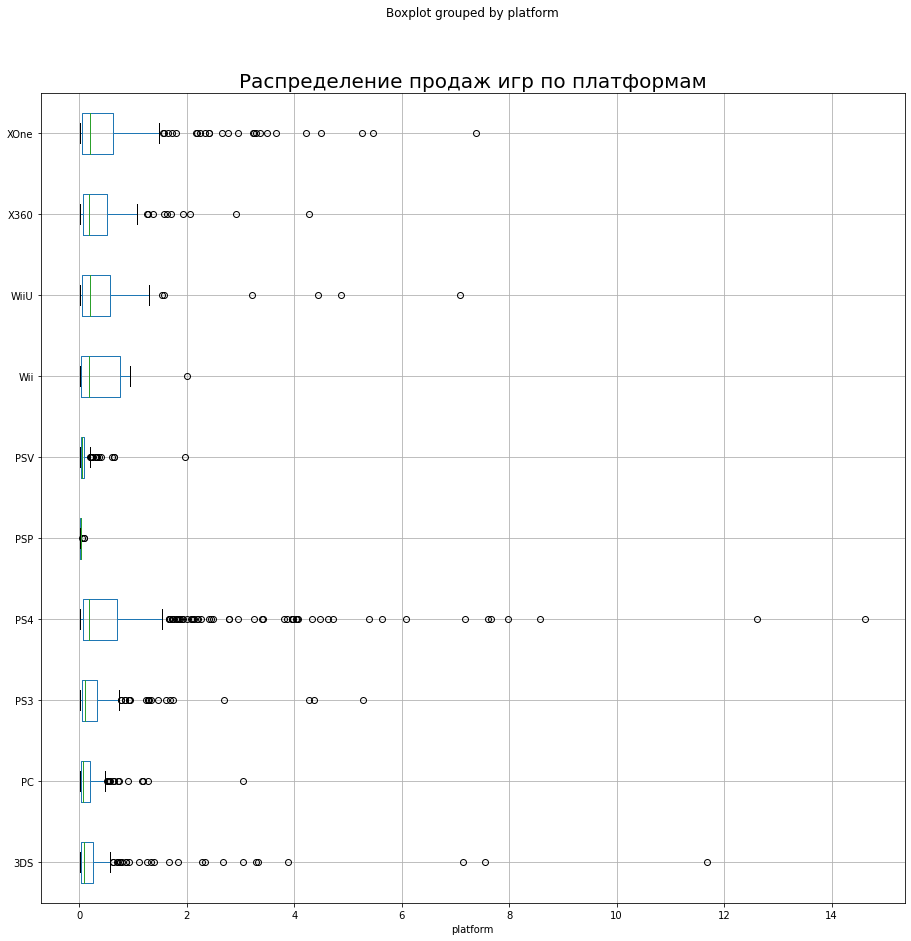

In [45]:
data_actual.boxplot('total_sales', by='platform', vert=False, figsize=(15, 15))
plt.title('Распределение продаж игр по платформам', fontdict = {'fontsize' : 20})
plt.show()

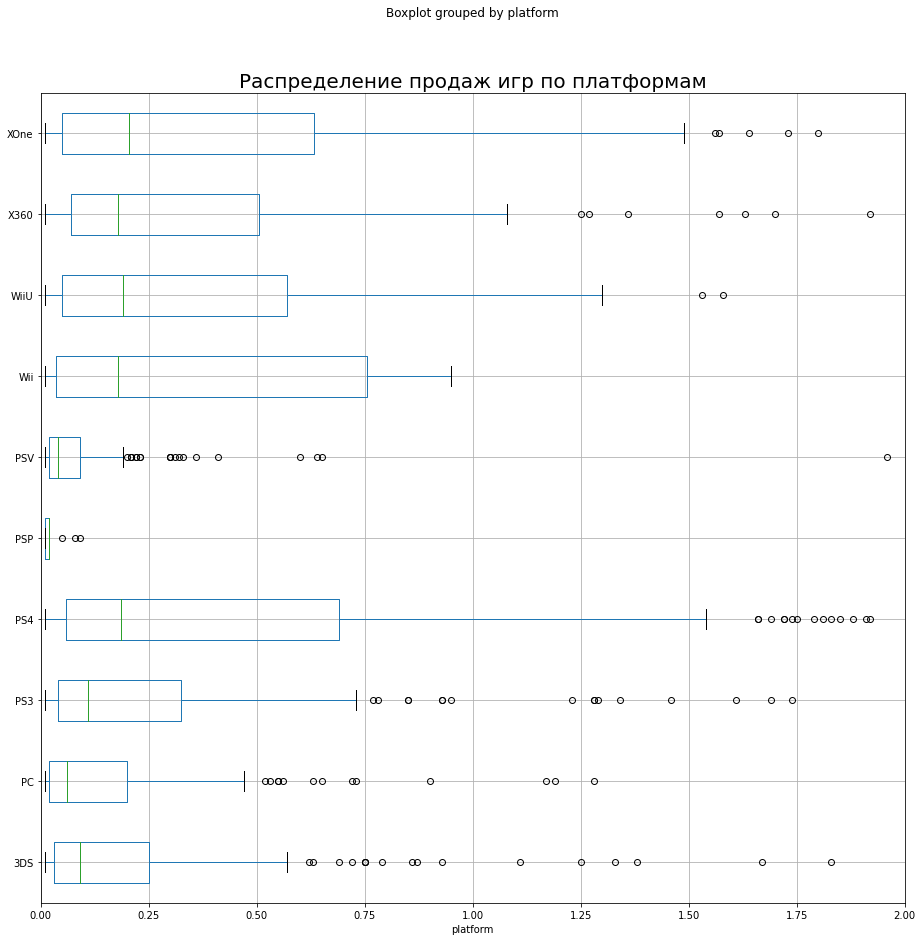

In [46]:
data_actual.boxplot('total_sales', by='platform', vert=False, figsize=(15, 15))
plt.title('Распределение продаж игр по платформам', fontdict = {'fontsize' : 20})
plt.xlim(0, 2)
plt.show()

По графику видно, что самые прибыльные платформы  PS4, XOne, 3DS имеют довольно сильные выбросы всторону увелечения.

Самыми прибыльными платформами за выбранный период стали  PS4, XOne, 3DS

Мы видем, что все платформы по уровню продаж к 2016 году падают. Есть платформы продаж по которым уже нет

Выберем в потенциальные прибыльные платформы, только те платформы, у которых  уровень продаж с 2014 к 2015 году не упал ниже 50%. Данные за 2016 год неполные, рассматривать их не станем.

In [47]:
data_actual_sum['proportion']=round(data_actual_sum[2015]*100/data_actual_sum[2014],1)
data_actual_platform=data_actual_sum.query('proportion >=50')
data_actual_platform=data_actual_platform[data_actual_platform[2016 ]> 0]
data_actual_platform['platform']

0     3DS
1      PC
3     PS4
5     PSV
7    WiiU
9    XOne
Name: platform, dtype: object

**Вывод**

- Продажи по платформам за последние года снижаются.
- Перестала приносить прибыль  платформы  PSP
- Можно выделить 6 потенциально прибыльные платформы:  3DS, PC, PS4, PSV, WiiU, XOne. Стоит сделать ставку на 2017 год именно на эти платформы, но так же стоит учесть, что продажи по ним падают.
- Самая прибыльная платформа - PS4.

#####  Влияют ли на продажи внутри одной популярной платформы отзывы пользователей и критиков. 

Посмотрим, как влияют на продажи внутри самой популярной платформы X360 отзывы пользователей и критиков. Построем диаграммы рассеяния и посчитаем корреляцию между отзывами и продажами.

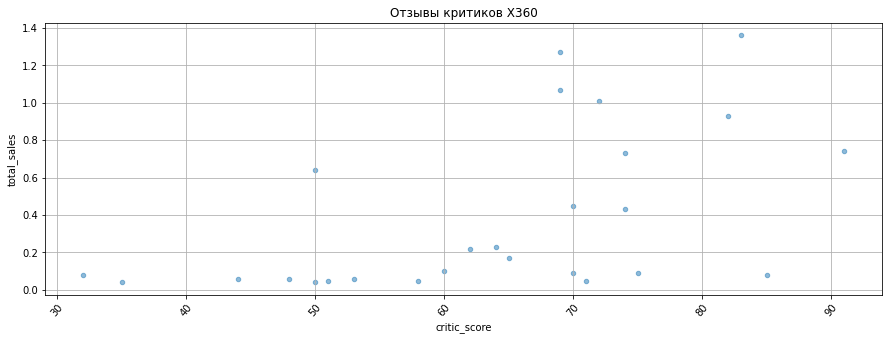

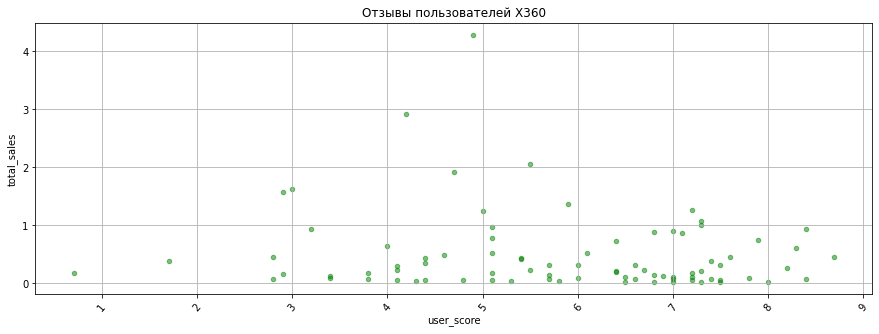

In [48]:
data_actual[data_actual['platform']=='X360'].plot(x='critic_score', y='total_sales', kind='scatter',
                                                  alpha=0.5, grid=True, figsize=(15, 5), rot=50,
                                                  title='Отзывы критиков X360')
data_actual[data_actual['platform']=='X360'].plot(x='user_score', y='total_sales', kind='scatter', c='green',
                                                  alpha=0.5, grid=True, figsize=(15, 5), rot=50,
                                                  title='Отзывы пользователей X360');


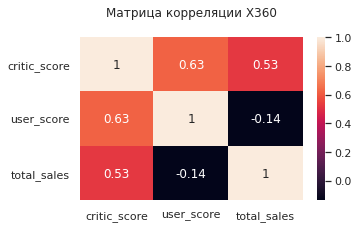

In [49]:
sns.set(rc = {'figure.figsize':(5,3)})
sns.heatmap(data_actual[['critic_score','user_score','total_sales','platform']]
            [data_actual['platform'] == 'X360'].corr(), annot = True).set(title = "Матрица корреляции X360\n")
plt.show()

- Отзывы критиков оказывают среднее влияние на уровень продаж игр на платформе X360. Отзывы пользователей влияния на уровень продаж игр практически не оказывают.
- Разница по уровню продаж заметна только между играми с очень низкими и очень высокими оценками. Игры в диапозоне средних оценок продаются одинаково.

**Посмотрим как выглядит ситуация с отзывами и уровнем продаж на платформах которые мы выбрали как потенциально прибыльные**

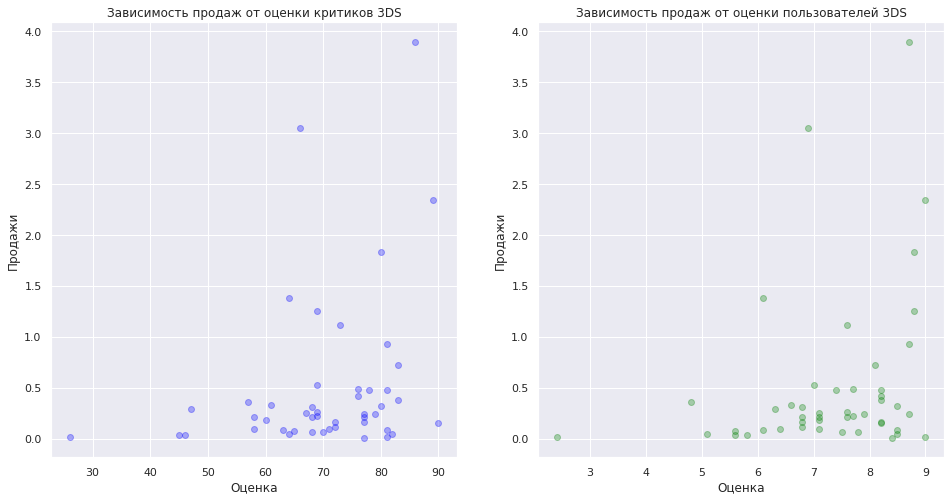

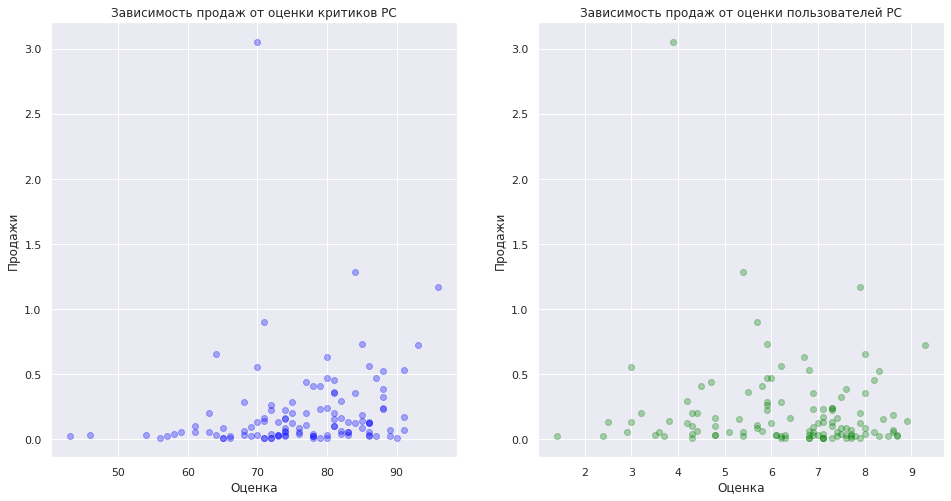

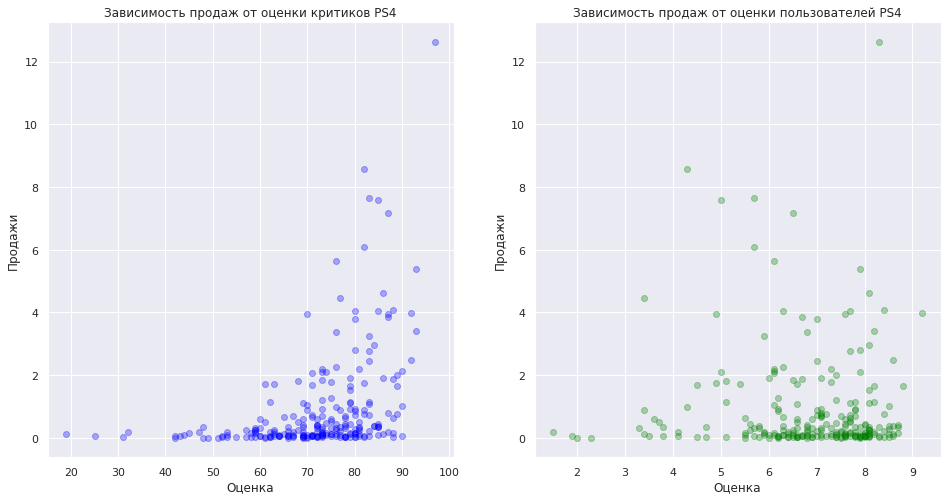

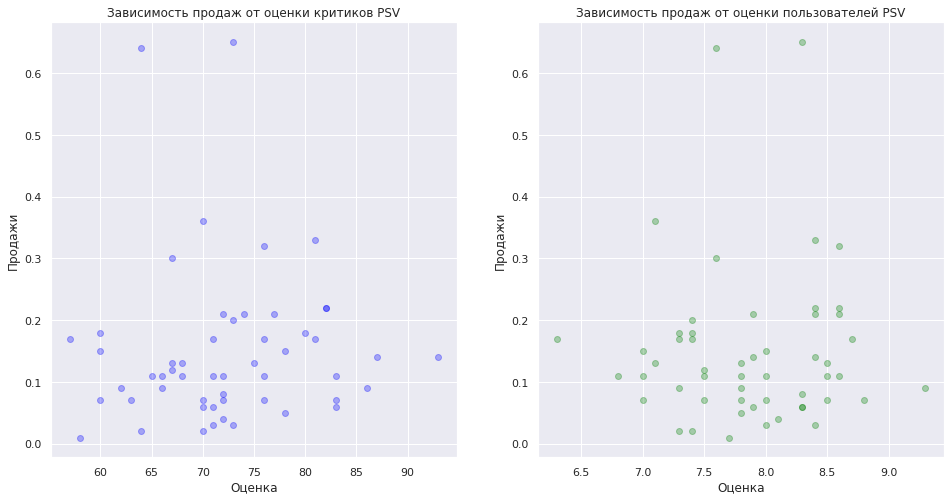

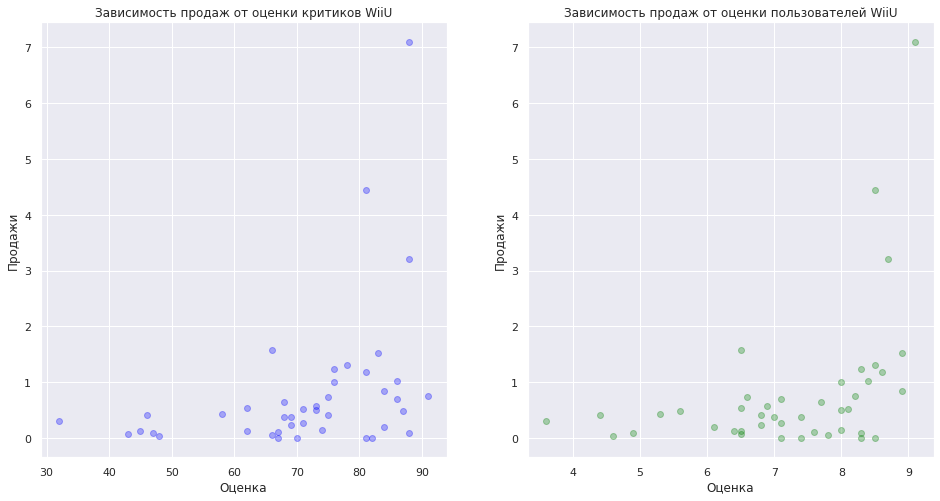

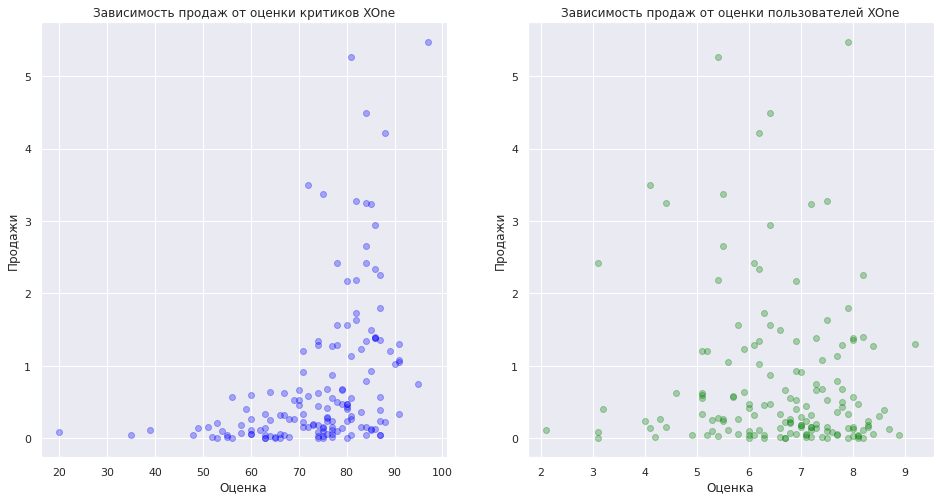

In [50]:
for platform in data_actual_platform['platform']:
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
    axs[0].scatter(data=data_actual.dropna()[data_actual['platform'] == platform], # критики
                   y='total_sales', 
                   x='critic_score', 
                   c='blue',
                   alpha=0.3)
    axs[1].scatter(data=data_actual.dropna()[data_actual['platform'] == platform], # пользователи
                   y='total_sales', 
                   x='user_score', 
                   c='green',
                   alpha=0.3)
    axs[0].set_title(f'Зависимость продаж от оценки критиков {platform}')
    axs[1].set_title(f'Зависимость продаж от оценки пользователей {platform}')
    for ax in axs.flat:
        ax.set(xlabel='Оценка', ylabel='Продажи')
    plt.show()

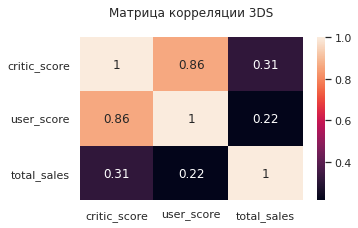

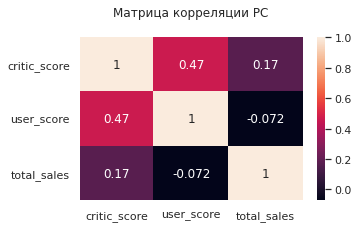

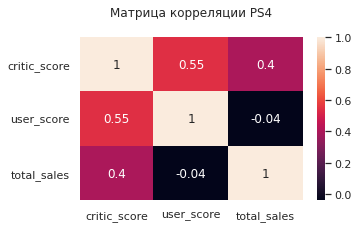

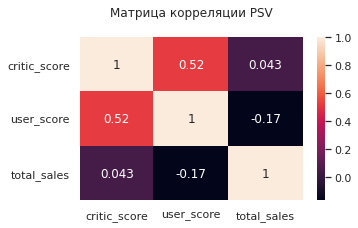

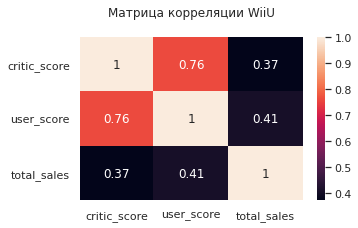

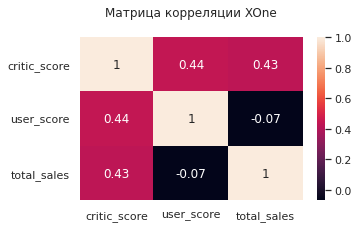

In [51]:
for platform in data_actual_platform['platform']:
    sns.set(rc = {'figure.figsize':(5,3)})
    sns.heatmap(data_actual[['critic_score','user_score','total_sales','platform']]
                [data_actual['platform'] == platform].corr(), annot = True).set(title = f"Матрица корреляции {platform}\n")
    plt.show()


Картина примерно такая же как и с X360 - при покупке игры  пользователи скорее ориентируются на оценки критиков, чем нет. Оценки пользователей практически не оказывают влияния.
Возможно картина выглядела бы иначе, исли бы у нас было больше данных.

#####  Общее распределение игр по жанрам. Самые прибыльных жанры. Выделяются ли жанры с высокими и низкими продажами

Посмотрим на общее распределение игр по жанрам. Выберем самых прибыльные жанры. Выделим жанры с высокими и низкими продажами.

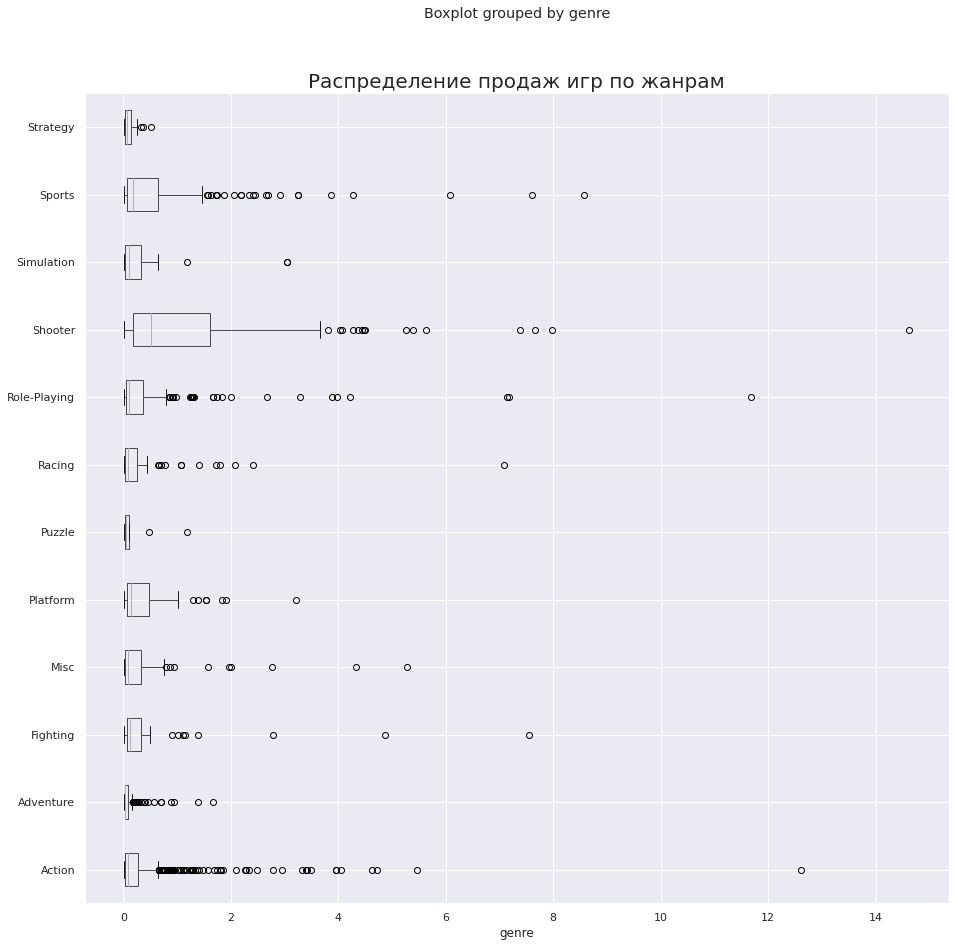

In [52]:
data_actual.boxplot('total_sales', by='genre', vert=False, figsize=(15, 15))
plt.title('Распределение продаж игр по жанрам', fontdict = {'fontsize' : 20})
plt.show()

Самые популярные жанры  с большимим выбросами - 'Action', 'Shooter', 'Role-Playing', 'Sports' .

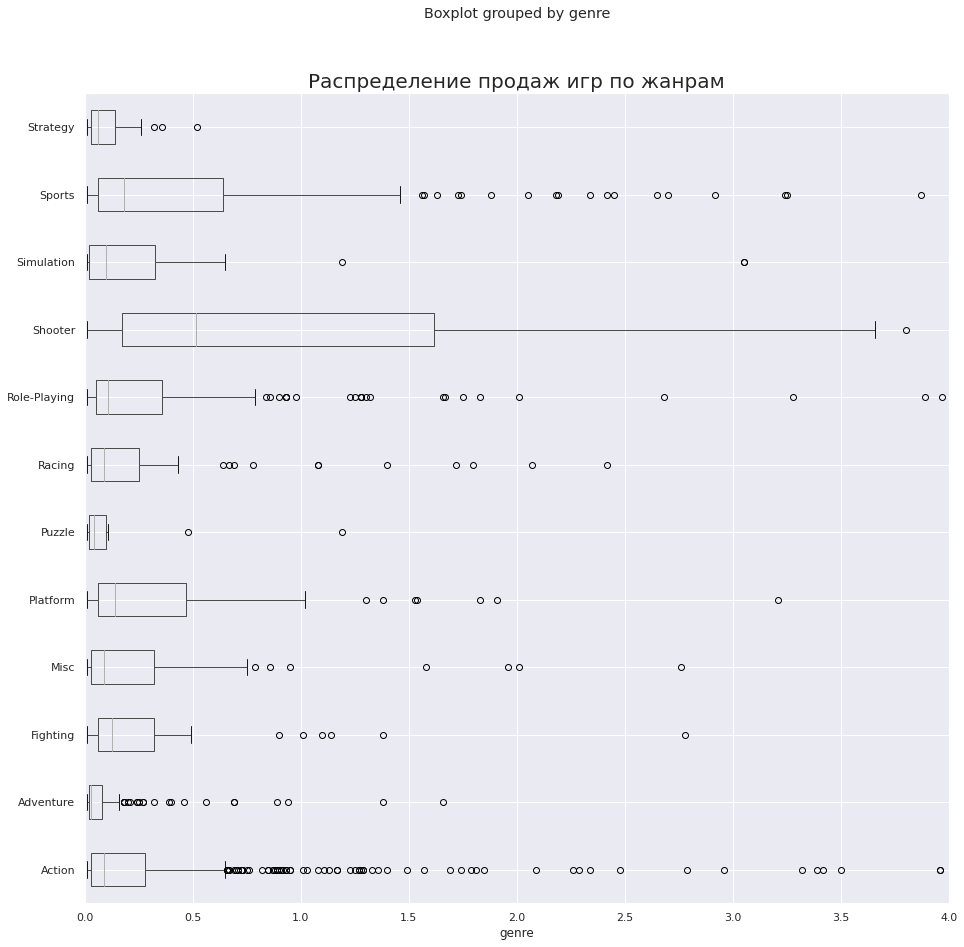

In [53]:
data_actual.boxplot('total_sales', by='genre', vert=False, figsize=(15, 15))
plt.title('Распределение продаж игр по жанрам', fontdict = {'fontsize' : 20})
plt.xlim(0, 4)
plt.show()

Глядя на граффик можно сделать вывод что, жанр 'Action' не смотря на большие выбросы, половина его продаж не сильно отличается от менее прибыльных игр, т.е. высокие продажи скорее исключение чем регулярность. В то время как жанр 'Shooter' - хоть и имеет большой разброс, но при этом большая часть продаж у него в диапазоне от 0,2 до 3,7 млн.

In [54]:
data_actual[data_actual['genre']=='Shooter']['total_sales'].describe()

count    128.000000
mean       1.335469
std        2.050567
min        0.010000
25%        0.172500
50%        0.515000
75%        1.617500
max       14.630000
Name: total_sales, dtype: float64

In [55]:
data_actual[data_actual['genre']=='Action']['total_sales'].describe()

count    619.000000
mean       0.322068
std        0.798181
min        0.010000
25%        0.030000
50%        0.090000
75%        0.280000
max       12.620000
Name: total_sales, dtype: float64

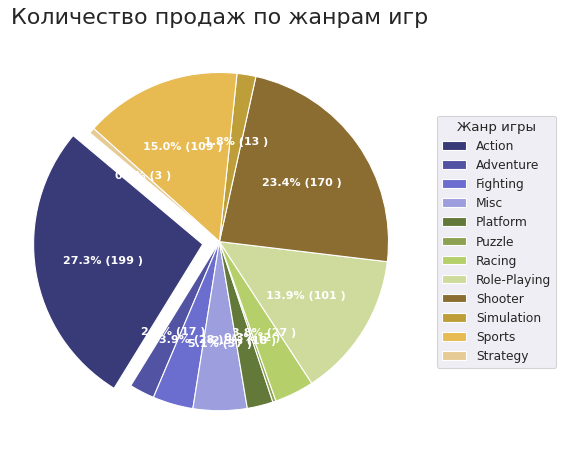

In [56]:
df = data_actual.pivot_table(index='genre', values='total_sales', aggfunc='sum')

fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"), dpi= 80)

df_data = df['total_sales']
categories = df.index
explode = [0.1,0,0,0,0,0,0,0,0,0,0,0]

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d} )".format(pct, absolute)

wedges, texts, autotexts = ax.pie(df_data, 
                                  autopct=lambda pct: func(pct, df_data),
                                  textprops=dict(color="w"), 
                                  colors=plt.cm.tab20b.colors,
                                 startangle=140,
                                 explode=explode)

ax.legend(wedges, categories, title="Жанр игры", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Количество продаж по жанрам игр", fontdict = {'fontsize' : 20})
plt.show()

- Самые прибыльные жанры с большимим выбросами - 'Action', 'Shooter', 'Role-Playing', 'Sports'.
- Жанры которые приносят меньше прибыли - 'Strategy', 'Puzzle', 'Adventure', 'Simulation' 
- Жанр 'Shooter' имеет более длинный ряд успешно продающихся игр

**Вывод**

- Пик выпуска игр приходился на 2008-2009 годах. Количество выпускаемых игр в год превышает 1400 шт.
- С 2010 года начинается спад, в 2012 году происходит сокращение выпускаемых игр в двое и уже не превышает 700 шт, и до 2016 года количество игр в год в среднем составляет 600 игр.
- Продажи по платформам за последние года снижаются.
- Средний срок продолжительности продаж игровых платформ - 10 лет. При этом пик продаж приходится на середину этого срока - 5 лет.
- Для построения прогноза на 2017 год взят период с 2014 до 2016 года включительно.
- Отзывы критиков оказывают среднее влияние на уровень продаж игр. Отзывы пользователей влияния на уровень продаж игр практически не оказывают. Возможно картина выглядела бы иначе, исли бы у нас было больше данных.
- Можно выделить 6 потенциально прибыльные платформы: DS, PC, PS4, PSV, WiiUб XOne. Стоит сделать ставку на 2017 год именно на эти платформы, но так же стоит учесть, что продажи по ним падают.
- Самая прибыльная платформа из потенциальных- PS4.
- Самые популярные жанры - 'Action', 'Shooter', 'Role-Playing', 'Sports'.
- Жанр 'Shooter' имеет более длинный ряд успешно продающихся игр


#### Составим портрет пользователя каждого региона

Определим для пользователя каждого региона (NA- 'Северная Америка', EU- 'Европа', JP -'Япония'):
- Самые популярные платформы (топ-5).
- Самые популярные жанры (топ-5). 
- Влияет ли рейтинг ESRB на продажи в отдельном регионе

#####  Самые популярные платформы (топ-5).

Определим для пользователя каждого региона (NA, EU, JP) самые популярные платформы (топ-5). Опишем различия в долях продаж.

In [57]:
data_region=data_actual[['platform','name','na_sales', 'eu_sales', 'jp_sales']]

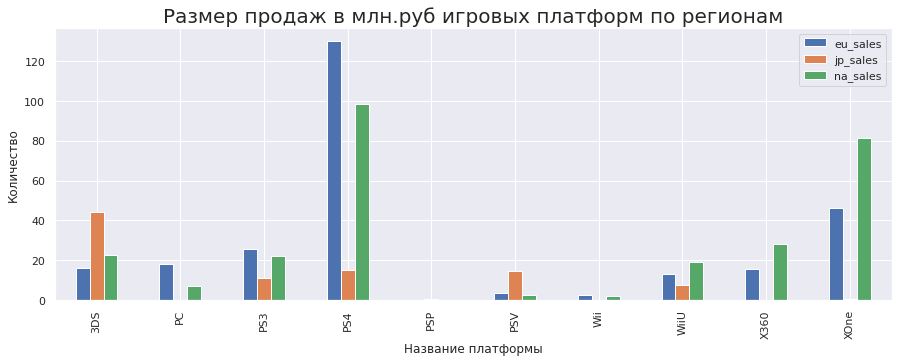

In [58]:
data_region.pivot_table(index='platform', aggfunc='sum').plot.bar(figsize=(15, 5))

plt.xlabel('Название платформы')
plt.ylabel('Количество')

plt.title("Размер продаж в млн.руб игровых платформ по регионам", fontdict = {'fontsize' : 20});

Посмотри на топ 5 платформ по регионам

In [59]:
data_region_top=data_region.pivot_table(index='platform', aggfunc='sum')
eu_sales=data_region_top.sort_values(by='eu_sales', ascending=False).head(5)
jp_sales=data_region_top.sort_values(by='jp_sales',ascending=False).head(5)
na_sales=data_region_top.sort_values(by='na_sales',ascending=False).head(5)

все, что не вошло в ТОП-5, объединять в категорию "другие" 

In [60]:
total =data_region_top['eu_sales'].sum()-eu_sales['eu_sales'].sum()
eu_sales.loc[len(eu_sales.index)] = [ total, 0,0] 
eu_sales = eu_sales.rename(index = {5:"other"})

total =data_region_top['jp_sales'].sum()-jp_sales['jp_sales'].sum()
jp_sales.loc[len(jp_sales.index)] = [0, total, 0] 
jp_sales = jp_sales.rename(index = {5:"other"})

total =data_region_top['na_sales'].sum()-na_sales['na_sales'].sum()
na_sales.loc[len(na_sales.index)] = [0,0, total] 
na_sales = na_sales.rename(index = {5:"other"})

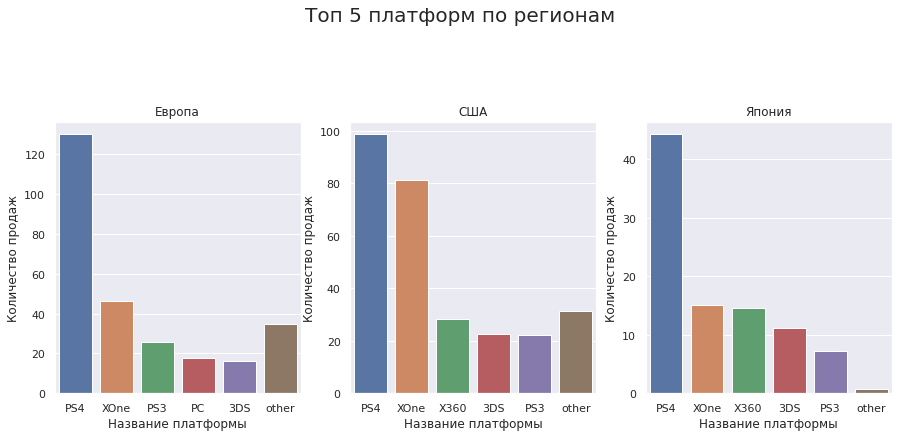

In [61]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.barplot(x=eu_sales.index, y="eu_sales",data=eu_sales)
plt.xlabel('Название платформы')
plt.ylabel('Количество продаж')
plt.title('Европа')
plt.subplot(1, 3, 2)
sns.barplot(x=na_sales.index, y="na_sales",data=na_sales)
plt.xlabel('Название платформы')
plt.ylabel('Количество продаж')
plt.title('США')
plt.subplot(1, 3, 3)
sns.barplot(x=na_sales.index, y="jp_sales",data=jp_sales)
plt.xlabel('Название платформы')
plt.ylabel('Количество продаж')
plt.title('Япония')

plt.suptitle('Топ 5 платформ по регионам',y = 1.2,fontsize = 20)
plt.show()

**Вывод**

топ 5 платформ по регионам:
- Европа - лидирует PS4, сильно  уступают XOne, PS3, PC, 3DS
- Северная Америка - лидирует PS4, далее идет XOne,  менее популярны X360, 3DS, PS3

- Япония - так же лидер PS4, значительно меньше пользуются спросом XOne, X360, 3DS, PS3

**Самые популярные жанры (топ-5).**

In [62]:
region_genre=data_actual[['genre','name','na_sales', 'eu_sales', 'jp_sales']]

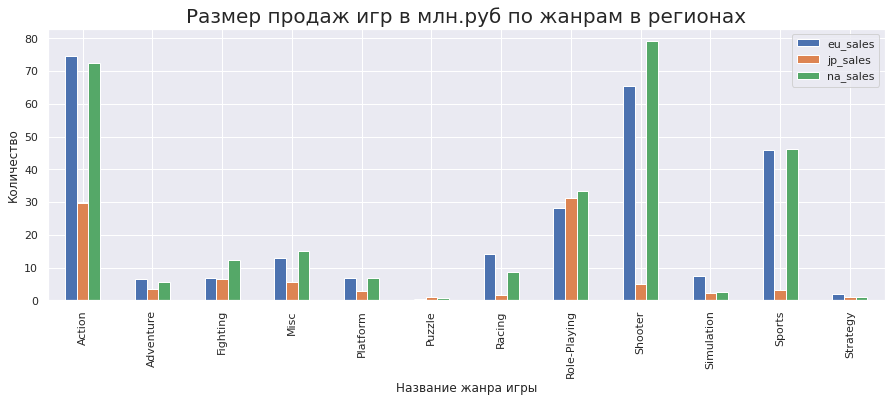

In [63]:
region_genre.pivot_table(index='genre', aggfunc='sum').plot.bar(figsize=(15, 5))
plt.xlabel('Название жанра игры')
plt.ylabel('Количество')

plt.title("Размер продаж игр в млн.руб по жанрам в регионах", fontdict = {'fontsize' : 20});

Посмотри на топ 5 жанров в играх по регионам

In [64]:
region_genre_top=region_genre.pivot_table(index='genre', aggfunc='sum')
eu_sales_genre=region_genre_top.sort_values(by='eu_sales', ascending=False).head(5)
na_sales_genre=region_genre_top.sort_values(by='na_sales',ascending=False).head(5)
jp_sales_genre=region_genre_top.sort_values(by='jp_sales',ascending=False).head(5)

все, что не вошло в ТОП-5, объединять в категорию "другие"

In [65]:
total =region_genre_top['eu_sales'].sum()-eu_sales_genre['eu_sales'].sum()
eu_sales_genre.loc[len(eu_sales_genre.index)] = [ total, 0,0] 
eu_sales_genre = eu_sales_genre.rename(index = {5:"other"})

total =region_genre_top['jp_sales'].sum()-jp_sales_genre['jp_sales'].sum()
jp_sales_genre.loc[len(jp_sales_genre.index)] = [0, total, 0] 
jp_sales_genre = jp_sales_genre.rename(index = {5:"other"})

total =region_genre_top['na_sales'].sum()-na_sales_genre['na_sales'].sum()
na_sales_genre.loc[len(na_sales_genre.index)] = [0,0, total] 
na_sales_genre = na_sales_genre.rename(index = {5:"other"})

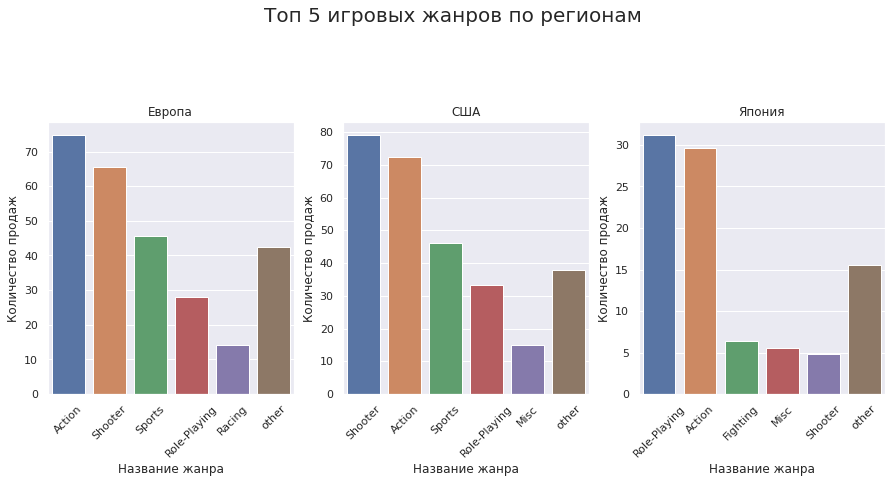

In [66]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.barplot(x=eu_sales_genre.index, y="eu_sales",data=eu_sales_genre)
plt.xticks(rotation=45)
plt.xlabel('Название жанра')
plt.ylabel('Количество продаж')
plt.title('Европа')
plt.subplot(1, 3, 2)
sns.barplot(x=na_sales_genre.index, y="na_sales",data=na_sales_genre)
plt.xticks(rotation=45)
plt.xlabel('Название жанра')
plt.ylabel('Количество продаж')
plt.title('США')
plt.subplot(1, 3, 3)
sns.barplot(x=jp_sales_genre.index, y="jp_sales",data=jp_sales_genre)
plt.xticks(rotation=45)
plt.xlabel('Название жанра')
plt.ylabel('Количество продаж')
plt.title('Япония')

plt.suptitle('Топ 5 игровых жанров по регионам',y = 1.2,fontsize = 20)
plt.show()

**Вывод**

топ 5 игровых жанров по регионам:
- Европа - лидирует Action, далее идет Shooter, чуть менее популярны Sports, Role-Playing, Racing
- Северная Америка - лидирует Action, далее идет Shooter, чуть менее популярны Sports, Role-Playing, Misc
- Япония - лидер Role-Playing, далее Action, значительно меньше пользуются спросом Fighting, Misc, Shooter

##### Влияет ли рейтинг ESRB на продажи в отдельном регионе

Расшифровки рейтингов ESRB:

- E - подходит для всех
- E10+ - для всех старше 10 лет
- Т - для подростков старше 13 лет
- M - контент для лиц старше 17 лет
- RP - ожидается рейтинг, окончательный рейтинг еще не присвоен
- EC - для детей старше 3 лет

In [67]:
rating=data_actual[['rating','na_sales', 'eu_sales', 'jp_sales',]]

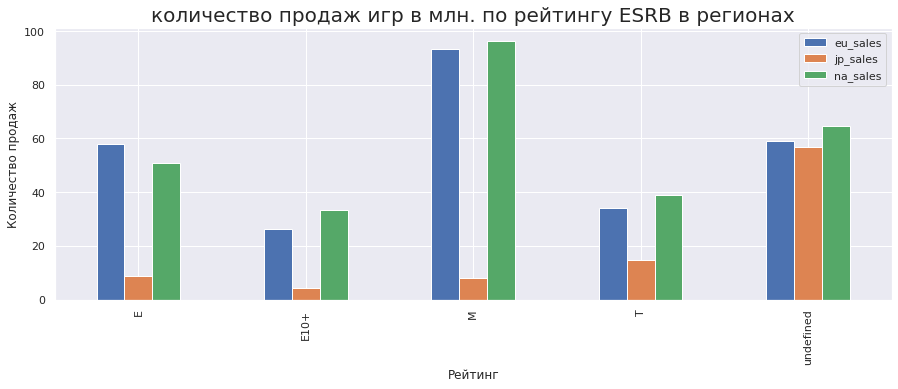

In [68]:
rating.pivot_table(index='rating', aggfunc='sum').plot.bar(figsize=(15, 5))
plt.xlabel('Рейтинг')
plt.ylabel('Количество продаж')

plt.title("количество продаж игр в млн. по рейтингу ESRB в регионах", fontdict = {'fontsize' : 20});

**Вывод**

- Самые популярные игры в Европе и Америке с рейтингом -М (контент для лиц старше 17 лет)
- По Японии слишком мало данных, скоре всего там используют рейтинг от другой компании. Из представленных, с небольшим отрывом, лидируют игры с рейтингом Т - для подростков старше 13 лет.

### Проверем гипотезы

#####  Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

```
Нулевая гипотеза:
Средний пользовательский рейтинг платформы Xbox One ('XOne')  = среднему пользовательскому рейтингу платформы PC ('PC')
Альтернативная гипотеза:
Средний пользовательский рейтинг платформы Xbox One ('XOne') ≠ среднему пользовательскому рейтингу платформы PC ('PC')
alpha = 0.05
```

In [69]:
xone=data_actual[(data_actual['platform'] =='XOne') & (data_actual['user_score']>=0)]['user_score']
pc=data_actual[(data_actual['platform'] =='PC')& (data_actual['user_score']>=0)]['user_score']

In [70]:
results = st.ttest_ind(xone, pc, equal_var =  False)

alpha = 0.05

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


Р-значение 0,11 означает, что есть 11% (вероятность в процентах)получить наблюдаемый результат, при условии, что нулевая гипотеза верна. И так как он выше alpha, результат  не обусловлен случайностью.

Значит, в среднем,  пользовательские рейтинги на одной из платформ не отличаются, от рейтингов на другой.

In [71]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями ...

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:

    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1912450522572209
Не получилось отвергнуть нулевую гипотезу


#####  Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

```
Нулевая гипотеза:
Средний пользовательский рейтинг жанров Action  ('Action')  = среднему пользовательскому рейтингу жанров Sports  ('Sports')
Альтернативная гипотеза:
Средний пользовательский рейтинг жанров Action  ('Action') ≠ среднему пользовательскому рейтингу жанров Sports  ('Sports')
alpha = 0.05
```

In [72]:
action=data_actual[(data_actual['genre'] =='Action') & (data_actual['user_score']>=0)]['user_score']
sports=data_actual[(data_actual['genre'] =='Sports')& (data_actual['user_score']>=0)]['user_score']

In [73]:
results = st.ttest_ind(action, sports, equal_var =  False)

alpha = 0.05

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


Значит средние пользовательские оценки жанров Action и Sports разные

### Общий вывод

**Перед проведением исследовательского анализа был проведен обзор и предобработка данных:**
- Данные приведены к типу, в соответствии со хранящейся в них информации.
- Заполнены пропущенные значения там, где это возможно.

В таблицу с данными добавлена информация:
 - общая сумма продаж во всех регионах


**Вывод:**

- С 1994 года начинается плавный рост выпуска новых игр, их количество достигает уже до несколько сотен в год.
- С началом 2000-х выпуск   игр резко возрастает и достигает пика в 2008-2009 годах. Количество выпускаемых игр в год превышает 1400 шт.
- С 2010 года начинается спад, в 2012 году происходит сокращение выпускаемых игр,на 2016 год количество в среднем составляет 600 игр в год
- Продажи игр по всем платформам за последние 5 лет снизились.
- Средний срок продолжительности продаж игровых платформ - 10 лет. При этом пик продаж приходится на середину этого срока - 5 лет.
- Можно выделить 6 потенциально прибыльные платформы: 3DS, PC, PS4, PSV, WiiU,  XOne. Стоит сделать ставку на 2017 год именно на эти платформы, но так же стоит учесть, что продажи по ним падают.
- Самая прибыльная платформа из потенциальных - PS4.
- Самые популярные жанры -  'Action',  'Shooter', 'Role-Playing', 'Sports'.  Жанр 'Shooter' имеет более длинный ряд успешно продающихся игр
- Отзывы критиков оказывают среднее влияние на уровень продаж игр. Покупатели скорее прислушаются к критикам и не купят игру  с очень низким рейтингом. Отзывы пользователей влияния на уровень продаж игр практически не оказывают.

Для проведения рекламной компании стоит учесть лидеров в индустрии по регионам:
- В Европе -  лидирует платформа  PS4 и жанр игры Action с  рейтингом -М (контент для лиц старше 17 лет)
- В Северной Америке – так же лидирует  PS4, жанр игры Action и игры с рейтингом -М (контент для лиц старше 17 лет)

- В Японии  - безоговорочный лидер  PS4, жанр игры Role-Playing и  игры с  рейтингом Т - для подростков старше 13 лет.


- Средние пользовательские рейтинги Xbox ONE и PC не будут отличаться.
- Средние пользовательские оценки жанров Action и Sports разные

